In [1]:
import nbimporter
from map import Map
from organisms import Organism, Plant
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import clear_output

Importing Jupyter notebook from map.ipynb
Importing Jupyter notebook from organisms.ipynb


In [2]:
m = Map(20)

In [3]:
archive = defaultdict(lambda: [])

In [4]:
p = Plant(10, m)
archive[10].append(p)

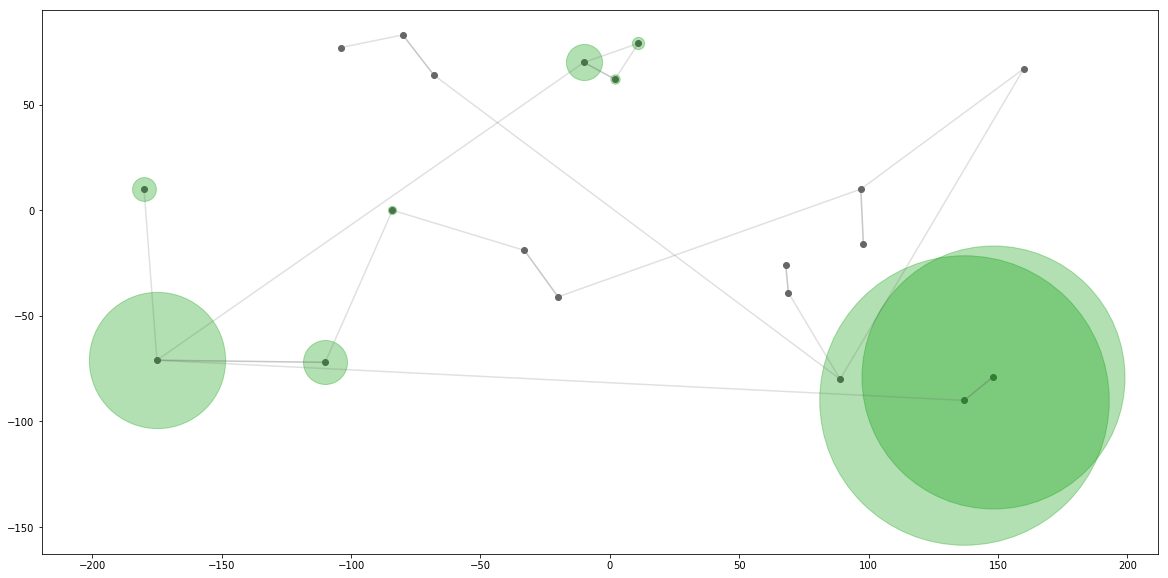

In [5]:
for iteration in range(0,50):
    clear_output(wait=True)
    buffer = defaultdict(lambda: [])
    for k, v in archive.items():
        for plant in v:
            seed = plant.generate()
            if seed is not None:
                buffer[seed.location].append(seed)
    for k, v in buffer.items():
        archive[k] += v
    fig, ax = plt.subplots(figsize=(20,10))
    m.show(ax)
    for k, v in archive.items():
        if len(v) > 0:
            ax.scatter(m.map[k][0], m.map[k][1], s=len(v)*10, 
                       alpha=0.3, c='#009900')
    plt.show()

In [6]:
stats = []
for k, v in archive.items():
    for plant in v:
        lp = list(plant.to_array()) + [plant.countgen, plant.gen]
        stats.append(lp)

In [7]:
import pandas as pd

In [10]:
P = pd.DataFrame(stats, columns=['lon', 'lat', 'gamma', 
                                 'delta', 'mu', 'age', 'genrate'])

In [11]:
P.head()

,lon,lat,gamma,delta,mu,age,genrate
0,148.0,-79.0,0.200000,0.01,0.1,50,14
1,148.0,-79.0,0.209182,0.01,0.1,45,14
2,148.0,-79.0,0.217694,0.01,0.1,44,7
3,148.0,-79.0,0.199364,0.01,0.1,43,9
4,148.0,-79.0,0.205486,0.01,0.1,40,4


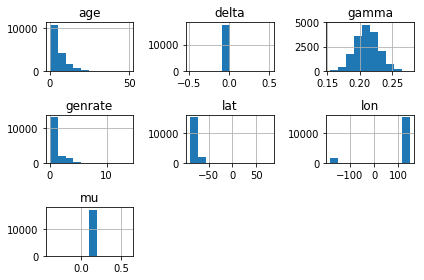

In [15]:
P.hist()
plt.tight_layout()
plt.show()

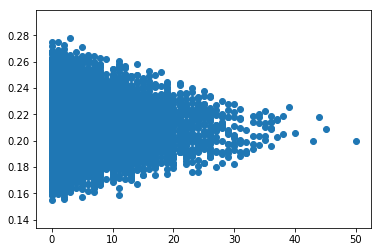

In [16]:
plt.scatter(P.age, P.gamma)
plt.show()

In [ ]:
P.to_excel('')